In [ ]:
!pip install cartopy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.7/11.7 MB 44.8 MB/s eta 0:00:00


In [ ]:
# !pip install netCDF4 h5netcdf

In [ ]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import cartopy.feature as cf
import cartopy.crs as ccrs
import cartopy.mpl.ticker as cticker

from cartopy.util import add_cyclic_point
from matplotlib import animation
from tqdm.auto import tqdm
from datetime import datetime,timedelta

In [ ]:
import  xarray as xr
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime,timedelta
import warnings
import math
from tqdm.auto import tqdm
from tqdm.auto import tqdm


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Daily maximums


In [ ]:
ds_ept=xr.open_dataset('/content/drive/MyDrive/AP_HW/Scripts-ll/HW_dates/data/ept_bdt_masked.nc')
ds_t2m=xr.open_dataset('/content/drive/MyDrive/AP_HW/Scripts-ll/HW_dates/data/t2m_bdt_masked.nc')

In [ ]:
# ds_ept

In [ ]:
# ds_t2m

In [ ]:
ds_ept_daily_max=ds_ept.ept.resample(time='D').max()
ds_t2m_daily_max=ds_t2m.t2m.resample(time='D').max()



In [ ]:
# ds_ept_daily_max

In [ ]:
# ds_t2m_daily_max

# Rolling Threshold


In [ ]:
max_t2m = ds_t2m_daily_max.sel(time=~((ds_t2m_daily_max.time.dt.month == 2) & (ds_t2m_daily_max.time.dt.day == 29)))
# max_t2m
max_ept = ds_ept_daily_max.sel(time=~((ds_ept_daily_max.time.dt.month == 2) & (ds_ept_daily_max.time.dt.day == 29)))
# max_ept

In [ ]:
max_t2m_copy = max_t2m.sel(time=max_t2m.time.dt.year.isin(range(1981,2011)))
max_t2m_copy['doy'] = max_t2m_copy['time'].dt.dayofyear
max_t2m_copy

max_ept_copy = max_ept.sel(time=max_ept.time.dt.year.isin(range(1981,2011)))
max_ept_copy['doy'] = max_ept_copy['time'].dt.dayofyear
max_ept_copy

<xarray.DataArray 'ept' (time: 10950, latitude: 24, longitude: 19)> Size: 40MB
array([[[         nan, 323.5558911 , 324.21204085, ...,          nan,
                  nan,          nan],
        [         nan, 323.55642433, 323.81375784, ...,          nan,
                  nan,          nan],
        [322.99862911, 322.98698492, 322.3532032 , ...,          nan,
                  nan,          nan],
        ...,
        [         nan,          nan,          nan, ..., 326.0802169 ,
         326.63998527, 326.79354799],
        [         nan,          nan,          nan, ...,          nan,
         325.46427388,          nan],
        [         nan,          nan,          nan, ...,          nan,
         329.95991815,          nan]],

       [[         nan, 323.01018623, 322.48133397, ...,          nan,
                  nan,          nan],
        [         nan, 324.24454751, 324.29934334, ...,          nan,
                  nan,          nan],
        [323.12144848, 323.4640473 , 323.5931968 , ...,          nan,
                  nan,          nan],
...
        [         nan,          nan,          nan, ..., 329.77401272,
         332.28286149, 336.47265866],
        [         nan,          nan,          nan, ...,          nan,
         329.33157222,          nan],
        [         nan,          nan,          nan, ...,          nan,
         328.48039824,          nan]],

       [[         nan, 324.83700768, 324.56067853, ...,          nan,
                  nan,          nan],
        [         nan, 323.4970152 , 325.17456975, ...,          nan,
                  nan,          nan],
        [324.69384916, 324.13976842, 323.90427891, ...,          nan,
                  nan,          nan],
        ...,
        [         nan,          nan,          nan, ..., 329.94713558,
         332.93798471, 335.88473164],
        [         nan,          nan,          nan, ...,          nan,
         329.20137413,          nan],
        [         nan,          nan,          nan, ...,          nan,
         328.68752598,          nan]]])
Coordinates:
  * latitude   (latitude) float32 96B 26.5 26.25 26.0 25.75 ... 21.25 21.0 20.75
  * longitude  (longitude) float32 76B 88.0 88.25 88.5 88.75 ... 92.0 92.25 92.5
  * time       (time) datetime64[ns] 88kB 1981-01-01 1981-01-02 ... 2010-12-31
    doy        (time) int64 88kB 1 2 3 4 5 6 7 8 ... 359 360 361 362 363 364 365
Attributes:
    units:      K
    long_name:  Equivalent potential temperature

In [ ]:
t2m_day_group=max_t2m_copy.groupby('doy')
t2m_percentile_list=[]
for i in range(351):
  # print(i+1,i+15)
  combined = xr.concat([t2m_day_group[d] for d in range(i+1,i+16)], dim="time")
  percentile_95 = combined.quantile(0.95, dim="time") #calculating percentile for each individual grid for a day
  percentile_95=percentile_95.assign_coords(doy=8+i)
  percentile_95=percentile_95.to_dataset()
  t2m_percentile_list.append(percentile_95)
t2m_percentile_doy=xr.concat(t2m_percentile_list,dim='doy')
# t2m_percentile_doy

ept_day_group=max_ept_copy.groupby('doy')
ept_percentile_list=[]
for i in range(351):
  # print(i+1,i+15)
  combined = xr.concat([ept_day_group[d] for d in range(i+1,i+16)], dim="time")
  percentile_95 = combined.quantile(0.95, dim="time")
  percentile_95 = percentile_95.assign_coords(doy=8+i)
  percentile_95 = percentile_95.to_dataset()
  ept_percentile_list.append(percentile_95)
ept_percentile_doy=xr.concat(ept_percentile_list,dim='doy')
# ept_percentile_doy

In [ ]:
all_doys = np.arange(1, 366)  # Full range from 1 to 365
# Reindex the doy dimension to include all days (filling new ones with NaN)
t2m_expanded_ds = t2m_percentile_doy.reindex(doy=all_doys)
t2m_expanded_ds.to_netcdf('/content/drive/MyDrive/AP_HW/Scripts-ll/HW_dates/data/t2m_percentile_doy.nc')

ept_expanded_ds = ept_percentile_doy.reindex(doy=all_doys)
ept_expanded_ds.to_netcdf('/content/drive/MyDrive/AP_HW/Scripts-ll/HW_dates/data/ept_percentile_doy.nc')


In [ ]:
# ept_expanded_ds

# Data with threshold

In [ ]:
t2m_year_group=max_t2m.groupby('time.year')
t2m_yearly_list=[]
for year in range(1971,2025):
  percentile_array = xr.DataArray(
      data=t2m_expanded_ds.t2m.values,  # Ensure shape matches
      coords=t2m_year_group[year].coords,
      dims=t2m_year_group[year].dims
  )
  # Add new variable
  year_group_ds = t2m_year_group[year].to_dataset()  # Convert to Dataset
  year_group_ds["95th_t2m"] = percentile_array  # Assign the new array
  t2m_yearly_list.append(year_group_ds)
t2m_max_data=xr.concat(t2m_yearly_list,dim='time')
# t2m_max_data

ept_year_group=max_ept.groupby('time.year')
ept_yearly_list=[]
for year in range(1971,2025):
  percentile_array = xr.DataArray(
      data=ept_expanded_ds.ept.values,  # Ensure shape matches
      coords=ept_year_group[year].coords,
      dims=ept_year_group[year].dims
  )
  # Add new variable
  year_group_ds = ept_year_group[year].to_dataset()  # Convert to Dataset
  year_group_ds["95th_ept"] = percentile_array  # Assign the new array
  ept_yearly_list.append(year_group_ds)
ept_max_data=xr.concat(ept_yearly_list,dim='time')
# ept_max_data

In [ ]:
print(ept_expanded_ds.ept.shape,ept_year_group[1971].shape)

(365, 24, 19) (365, 24, 19)


# Warm days

In [ ]:
t2m_march_september=t2m_max_data.sel(time=t2m_max_data.time.dt.month.isin([3,4,5,6,7,8,9]))
ept_march_september=ept_max_data.sel(time=ept_max_data.time.dt.month.isin([3,4,5,6,7,8,9]))

# # t2m_march_september
# # ept_march_september

In [ ]:
df_t2m=t2m_march_september.to_dataframe().reset_index()
df_ept=ept_march_september.to_dataframe().reset_index()


In [ ]:
# df_t2m

In [ ]:
# df_ept

In [ ]:
df = pd.merge(df_t2m,df_ept)
df

,time,latitude,longitude,t2m,95th_t2m,ept,95th_ept
0,1971-03-01,26.50,88.00,NaN,NaN,NaN,NaN
1,1971-03-01,26.50,88.25,298.130607,306.072416,324.951758,339.236424
2,1971-03-01,26.50,88.50,298.718252,305.983595,324.873768,340.409586
3,1971-03-01,26.50,88.75,NaN,NaN,NaN,NaN
4,1971-03-01,26.50,89.00,297.938344,306.361046,325.680615,340.226237
...,...,...,...,...,...,...,...
5269531,2024-09-30,20.75,91.50,NaN,NaN,NaN,NaN
5269532,2024-09-30,20.75,91.75,NaN,NaN,NaN,NaN
5269533,2024-09-30,20.75,92.00,NaN,NaN,NaN,NaN
5269534,2024-09-30,20.75,92.25,302.724121,302.999621,366.953278,364.414761


In [ ]:
df['warm_days']=0
# df

In [ ]:
hw_condition= (df['ept']>df['95th_ept'])|(df['t2m']>df['95th_t2m'])
df.loc[hw_condition,'warm_days']=1


In [ ]:
# df[df['warm_days']==1]


In [ ]:
df['warm_days'].value_counts()


,count
warm_days,
0,4915145
1,354391


## Heatwave List

In [ ]:
df['heatwave']=df['warm_days']
# df

In [ ]:
df['heatwave'].value_counts()

,count
heatwave,
0,4915145
1,354391


In [ ]:
df['time']=pd.to_datetime(df['time'])
dates=df.time.unique()

In [ ]:
dates

<DatetimeArray>
['1971-03-01 00:00:00', '1971-03-02 00:00:00', '1971-03-03 00:00:00',
 '1971-03-04 00:00:00', '1971-03-05 00:00:00', '1971-03-06 00:00:00',
 '1971-03-07 00:00:00', '1971-03-08 00:00:00', '1971-03-09 00:00:00',
 '1971-03-10 00:00:00',
 ...
 '2024-09-21 00:00:00', '2024-09-22 00:00:00', '2024-09-23 00:00:00',
 '2024-09-24 00:00:00', '2024-09-25 00:00:00', '2024-09-26 00:00:00',
 '2024-09-27 00:00:00', '2024-09-28 00:00:00', '2024-09-29 00:00:00',
 '2024-09-30 00:00:00']
Length: 11556, dtype: datetime64[ns]

In [ ]:
##### Heatwave Definition: minimum 3 consecutive days and 75 grids spread over BD #####

iteration=0
starting_date=[]
duration=[]
ending_date=[]
temporary_list=[]
for i in tqdm(range(len(dates)-1),desc='Dates',leave=True):
    grid_count=(df[df['time']==dates[i]]['warm_days'].values==1).sum()
    consecutive_day = (dates[i]-dates[i-1]).days==1 # consecutive days check
    if  grid_count>=75 and consecutive_day:
        iteration += 1
        temporary_list.append(dates[i])
    else:
        if iteration <=2:
            condition_1=(df['time']>= dates[i-iteration]) & (df['time']<=dates[i])
            df.loc[condition_1,'heatwave']=0
        if iteration >=3:
            starting_date.append(temporary_list[0])
            ending_date.append(temporary_list[-1])
            duration.append(iteration)
#             condition_2=(df['time']>=dates[i-iteration]) & (df['time']<=dates[i-1])
#             df.loc[condition_2,'Heatwave']=1
            condition_3=(df['time']==dates[i])
            df.loc[condition_3,'heatwave']=0
        iteration=0
        temporary_list=[]
print(len(starting_date),len(ending_date),len(duration))

##### end ####

Dates:   0%|          | 0/11555 [00:00<?, ?it/s]

239 239 239


In [ ]:
df = pd.DataFrame({'Starting_Date': starting_date, 'Ending_Date': ending_date,'Duration':duration})
df

,Starting_Date,Ending_Date,Duration
0,1972-04-23,1972-04-25,3
1,1972-05-08,1972-05-19,12
2,1972-06-06,1972-06-12,7
3,1972-07-11,1972-07-13,3
4,1972-07-23,1972-07-26,4
...,...,...,...
234,2024-07-13,2024-07-31,19
235,2024-08-13,2024-08-15,3
236,2024-08-29,2024-08-31,3
237,2024-09-02,2024-09-13,12


In [ ]:
df = df.to_csv('/content/drive/MyDrive/AP_HW/Scripts-ll/HW_dates/data/HW_list_rolling_def.csv',index=False)
df

## import the file

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/AP_HW/Scripts-ll/HW_dates/data/HW_list_rolling_def.csv')
df

,Starting_Date,Ending_Date,Duration
0,1972-04-23,1972-04-25,3
1,1972-05-08,1972-05-19,12
2,1972-06-06,1972-06-12,7
3,1972-07-11,1972-07-13,3
4,1972-07-23,1972-07-26,4
...,...,...,...
234,2024-07-13,2024-07-31,19
235,2024-08-13,2024-08-15,3
236,2024-08-29,2024-08-31,3
237,2024-09-02,2024-09-13,12


In [ ]:
df['Starting_Date'] = pd.to_datetime(df["Starting_Date"])
df['Ending_Date'] = pd.to_datetime(df["Ending_Date"])
df[df['Starting_Date'].dt.year == 2023]

,Starting_Date,Ending_Date,Duration
214,2023-03-02,2023-03-05,4
215,2023-04-08,2023-04-21,14
216,2023-05-07,2023-05-12,6
217,2023-05-29,2023-06-08,11
218,2023-06-13,2023-06-16,4
219,2023-06-30,2023-07-05,6
220,2023-07-18,2023-07-26,9
221,2023-07-28,2023-08-01,5
222,2023-08-15,2023-08-21,7
223,2023-08-28,2023-09-07,11


In [ ]:
# Calculate the time difference and store in a new column as the difference in days
df['Next_Row_Difference'] = (df['Starting_Date'].shift(-1) - df['Ending_Date']).dt.days
df=df.fillna(0)
# df

In [ ]:
# Create a new column to group rows where the difference is <= 2
df['Flag'] = (~(df['Next_Row_Difference'] <=2))
# df

In [ ]:
# Initialize the number counter
current_number = 1

# Iterate through the 'Flag' column
for i, value in enumerate(df['Flag']):
    if value:  # For True values
        df.at[i, 'Group'] = current_number
        current_number += 1  # Increment the number for each True
    else:  # For False values
        df.at[i, 'Group'] = current_number

In [ ]:
# df[(df['Starting_Date'].dt.year == 2023) | (df['Starting_Date'].dt.year == 2021)]

In [ ]:
# Merge rows in each group
df_merged = df.groupby('Group', as_index=False).agg({
    'Starting_Date': 'first',  # Take the first starting date in the group
    'Ending_Date': 'last',  # Take the last ending date in the group
})

# View the resulting merged DataFrame
df_merged.drop('Group',axis=1, inplace=True)


In [ ]:
df_merged['Duration']=(df_merged['Ending_Date'] - df_merged['Starting_Date']).dt.days +1
df_merged

,Starting_Date,Ending_Date,Duration
0,1972-04-23,1972-04-25,3
1,1972-05-08,1972-05-19,12
2,1972-06-06,1972-06-12,7
3,1972-07-11,1972-07-13,3
4,1972-07-23,1972-07-26,4
...,...,...,...
211,2024-06-23,2024-06-28,6
212,2024-07-07,2024-07-31,25
213,2024-08-13,2024-08-15,3
214,2024-08-29,2024-09-13,16


In [ ]:
df_merged[df_merged['Starting_Date'].dt.year == 2021]

,Starting_Date,Ending_Date,Duration
177,2021-03-08,2021-03-12,5
178,2021-03-21,2021-04-01,12
179,2021-04-24,2021-04-29,6
180,2021-05-17,2021-05-24,8
181,2021-07-09,2021-07-12,4
182,2021-08-04,2021-08-06,3
183,2021-08-22,2021-08-25,4
184,2021-09-03,2021-09-06,4
185,2021-09-09,2021-09-13,5
186,2021-09-23,2021-09-27,5


# Calculation by season

In [ ]:
df= df_merged
df['Starting_Date']=pd.to_datetime(df["Starting_Date"])
df['Year']=df['Starting_Date'].dt.year
yearly_sum=df.groupby('Year')['Duration'].sum().reset_index()

grouped = df.groupby('Year')
yearly_event_count=list(grouped.size())
len(yearly_event_count)


yearly_sum['total_events'] = yearly_event_count

pre_monsoon=df[(df['Starting_Date'].dt.month >= 3) & (df['Starting_Date'].dt.month <= 6)]
# pre_monsoon

yearly_pre_monsoon=pre_monsoon.groupby('Year')['Duration'].sum().reset_index()

all_years=range(1971,2024)
missing_years=set(all_years)-set(yearly_pre_monsoon['Year'])
missing_years_df=pd.DataFrame({'Year':list(missing_years),'Duration':0,'total_events':0})
yearly_pre_monsoon=pd.concat([yearly_pre_monsoon,missing_years_df],ignore_index=True)
yearly_pre_monsoon=yearly_pre_monsoon.sort_values(by='Year').reset_index(drop=True)

#Monsoon
moonson=df[(df['Starting_Date'].dt.month>=7)&(df['Starting_Date'].dt.month<=9)]
yearly_moonson=moonson.groupby('Year')['Duration'].sum().reset_index()
all_years=range(1971,2024)
missing_years=set(all_years)-set(yearly_moonson['Year'])
missing_years_df=pd.DataFrame({'Year':list(missing_years),
                              'Duration':0,'total_events':0})
yearly_moonson=pd.concat([yearly_moonson,missing_years_df],ignore_index=True)
yearly_moonson=yearly_moonson.sort_values(by="Year").reset_index(drop=True)




In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal.windows import gaussian
from scipy.ndimage import convolve1d
# Create a Gaussian kernel
window_size = 20  # Length of the kernel
sigma = 3.5
gaussian_kernel = gaussian(window_size, std=sigma)
gaussian_kernel /= gaussian_kernel.sum()  # Normalize kernel
gaussian_kernel

array([0.00287639, 0.00599681, 0.01152236, 0.02040374, 0.03329855,
       0.05008278, 0.06942228, 0.08868633, 0.10441477, 0.11329599,
       0.11329599, 0.10441477, 0.08868633, 0.06942228, 0.05008278,
       0.03329855, 0.02040374, 0.01152236, 0.00599681, 0.00287639])

## Plot

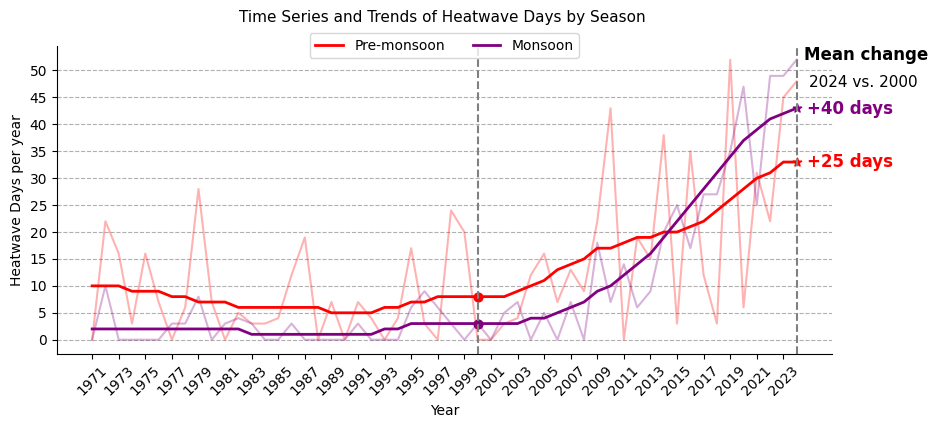

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal.windows import gaussian
from scipy.ndimage import convolve1d

# Specify the size of the figure (width, height) in inches
fig, ax = plt.subplots(figsize=(10, 4))

# Assuming yearly data is available
tickname = list(yearly_moonson['Year'])

x = np.arange(len(tickname))  # Create indices for the x-axis
y = np.arange(60)

y1 = yearly_pre_monsoon['Duration']
y2 = yearly_moonson['Duration']

#  Gaussian kernel
window_size = 20  # Length of the kernel
sigma = 3.5
gaussian_kernel = gaussian(window_size, std=sigma)
gaussian_kernel /= gaussian_kernel.sum()  # Normalize kernel

# Gaussian smoothing
smooth_y1 = convolve1d(y1, gaussian_kernel, mode='reflect')
smooth_y2 = convolve1d(y2, gaussian_kernel, mode='reflect')

# Plot the original data
ax.plot(tickname, y1, alpha=0.3, color='red')
ax.plot(tickname, y2, alpha=0.3, color='purple')

# Plot the smoothed data
ax.plot(tickname, smooth_y1, color='red', linewidth=2, label='Pre-monsoon')
ax.plot(tickname, smooth_y2, color='purple', linewidth=2, label='Monsoon')

# Adding a vertical line at the year 1980 and 2023
baseline=2000
endline=2024
ax.axvline(x=baseline, color='gray', linestyle='--', linewidth=1.5)
ax.axvline(x=endline, color='gray', linestyle='--', linewidth=1.5)

# Adding intersection points
ax.scatter(baseline, smooth_y1[baseline-1971], color='red', s=40)
ax.scatter(endline, smooth_y1[endline-1971], color='red', marker='*', s=40)
ax.scatter(baseline, smooth_y2[baseline-1971], color='purple', s=40)
ax.scatter(endline, smooth_y2[endline-1971], color='purple', marker='*', s=40)

# Calculating the difference between 2023 and 2000
pre_monsoon_rise = smooth_y1[endline-1971] - smooth_y1[baseline-1971]
monsoon_rise = smooth_y2[endline-1971] - smooth_y2[baseline-1971]

# text to highlight trends
ax.text(2028, 32, f'+{pre_monsoon_rise} days', fontsize=12, color='red', ha='center', fontweight='bold')
ax.text(2028, 42, f'+{monsoon_rise} days', fontsize=12, color='purple', ha='center', fontweight='bold')
ax.text(2029.2, 52, 'Mean change', fontsize=12, color='black', ha='center', fontweight='bold')
ax.text(2029, 47, f'{endline} vs. {baseline}', fontsize=11, color='black', ha='center')

# Removing top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# xticks and labels with rotation
ax.set_xticks(tickname[::2])
ax.set_xticklabels(tickname[::2], rotation=45)
# xticks and labels with rotation
yticks=np.arange(0,56)
ax.set_yticks(yticks[::5])
ax.set_yticklabels(yticks[::5])

# Display the legend (only for smoothed lines)
ax.legend(loc='center',bbox_to_anchor=(0.5, 1.0), fontsize=10,ncol=2)
ax.grid(axis='y', linestyle='--')

plt.xlabel('Year')
plt.ylabel('Heatwave Days per year')
plt.title('Time Series and Trends of Heatwave Days by Season ',y=1.05,fontsize=11)
plt.show()
